In [2]:
%load_ext autoreload
%autoreload 2

import wandb_util.wandb_util as wbu

run = wbu.api_run("pnxfbgll")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from text3d2video.artifacts.anim_artifact import AnimationArtifact
from text3d2video.artifacts.video_artifact import VideoArtifact

anim_art = wbu.used_artifacts(run, 'animation')[0]
anim_art = AnimationArtifact.from_wandb_artifact(anim_art)

video_art = wbu.logged_artifacts(run, 'video')[0]
video_art = VideoArtifact.from_wandb_artifact(video_art)

In [47]:
from text3d2video.util import index_list
from text3d2video.utilities.figure_creation_utils import write_image_seq

frame_indices = [0, 1, 2, 3, 4]

seq = anim_art.read_anim_seq(frame_indices)
frames = index_list(video_art.read_frames(), frame_indices)

uvs = seq.render_rgb_uv_maps()

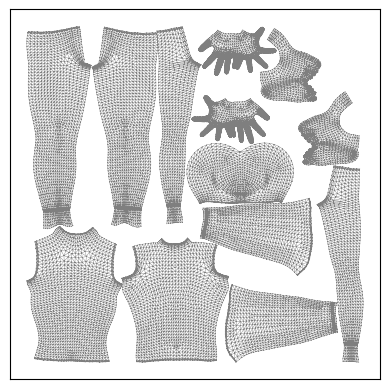

In [50]:
from matplotlib import pyplot as plt

from text3d2video.util import create_fresh_dir
from text3d2video.utilities.matplotlib_utils import mpl_uv_triangulation

folder = create_fresh_dir('outs/setup_fig')

verts_uvs, faces_uvs = anim_art.uv_data()

plt.triplot(mpl_uv_triangulation(verts_uvs, faces_uvs), color='black', alpha=0.5, linewidth=0.3)
plt.gca().set_aspect('equal')
plt.gca().set_xticks([])
plt.gca().set_yticks([])

plt.savefig(folder / 'uv_triangulation.pdf', dpi=300, bbox_inches='tight')
plt.savefig(folder / 'uv_triangulation.png', dpi=1000, bbox_inches='tight')

write_image_seq(folder, 'uvs', uvs)
write_image_seq(folder, 'frames', frames)

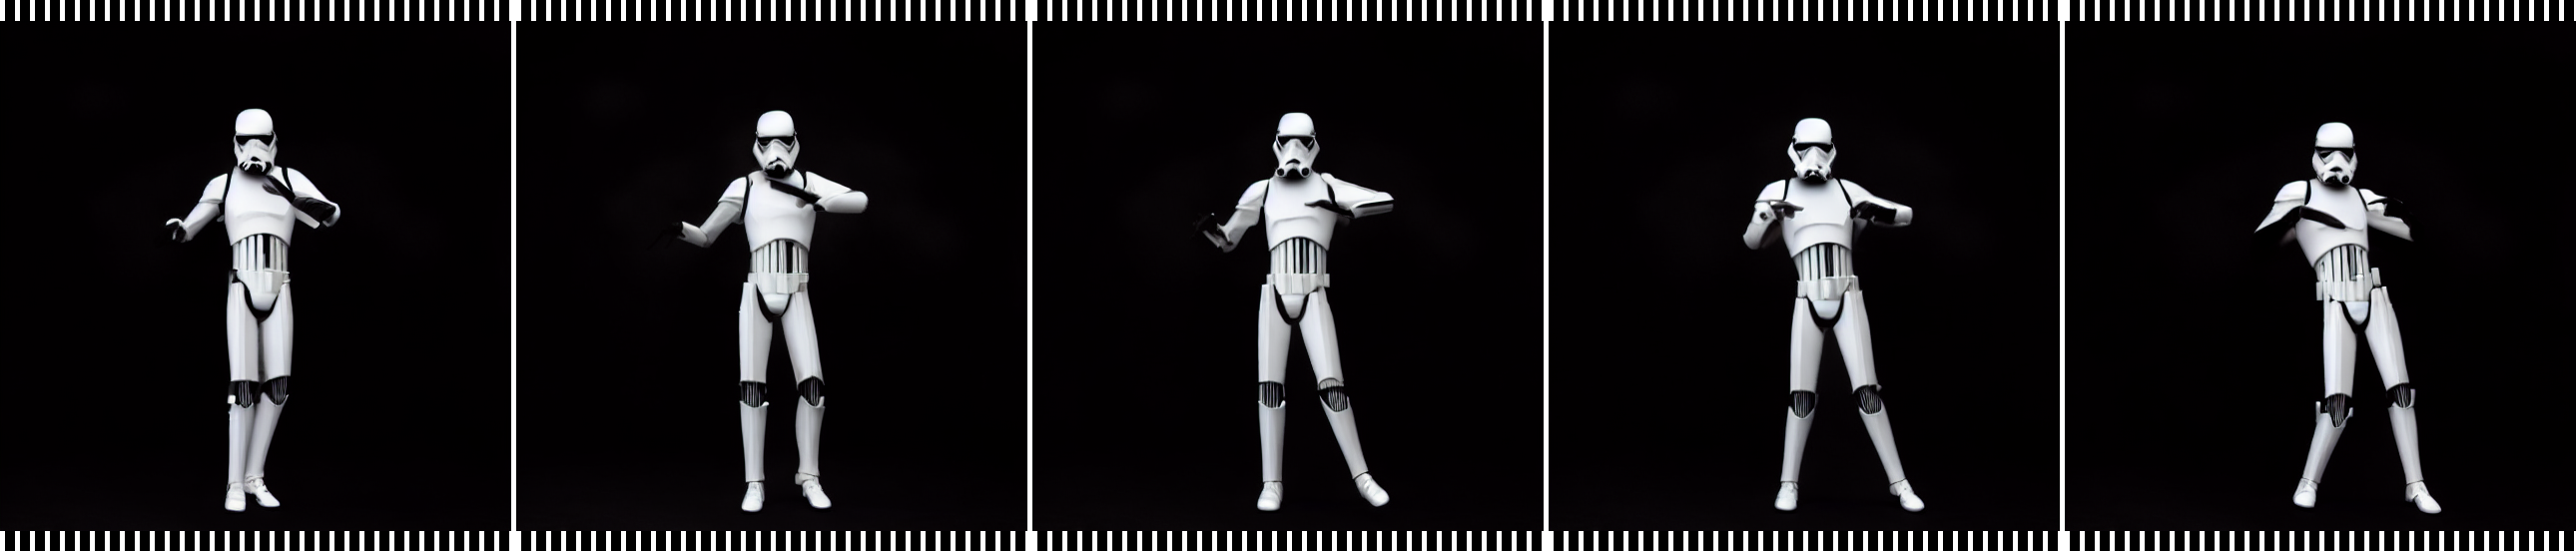

In [62]:
from text3d2video.utilities.figure_creation_utils import filmstrip_sequence


filmstrip_sequence(frames, slit_height=20, spacing=5)

In [ ]:
from text3d2video.utilities.figure_creation_utils import export_scene_with_cameras


export_scene_with_cameras(seq.meshes, seq.cams, folder / "scene.glb")